In [1]:
import math

import matplotlib.pyplot as plt
import torch
from torch import nn

In [3]:
torch.manual_seed(111)

In [4]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

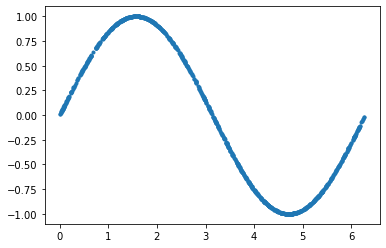

In [5]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [8]:
class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )


    def forward(self, x):
        output = self.model(x)
        return output

In [13]:
discriminator = Discriminator()
generator = Generator()

In [14]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [15]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [16]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.25311705470085144
Epoch: 0 Loss G.: 1.888545036315918
Epoch: 10 Loss D.: 0.5732226967811584
Epoch: 10 Loss G.: 0.8345379829406738
Epoch: 20 Loss D.: 0.6936279535293579
Epoch: 20 Loss G.: 0.8637839555740356
Epoch: 30 Loss D.: 0.59722900390625
Epoch: 30 Loss G.: 1.0184900760650635
Epoch: 40 Loss D.: 0.6707755923271179
Epoch: 40 Loss G.: 0.6563605070114136
Epoch: 50 Loss D.: 0.6867240071296692
Epoch: 50 Loss G.: 0.7379283308982849
Epoch: 60 Loss D.: 0.6994175910949707
Epoch: 60 Loss G.: 0.6676411032676697
Epoch: 70 Loss D.: 0.6484549045562744
Epoch: 70 Loss G.: 0.901470959186554
Epoch: 80 Loss D.: 0.7385814189910889
Epoch: 80 Loss G.: 0.7859456539154053
Epoch: 90 Loss D.: 0.6581752300262451
Epoch: 90 Loss G.: 0.7928749322891235
Epoch: 100 Loss D.: 0.6923357248306274
Epoch: 100 Loss G.: 0.6460329294204712
Epoch: 110 Loss D.: 0.7273387908935547
Epoch: 110 Loss G.: 0.6737794876098633
Epoch: 120 Loss D.: 0.6735665798187256
Epoch: 120 Loss G.: 0.7867452502250671
Epoch: 130 

In [17]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

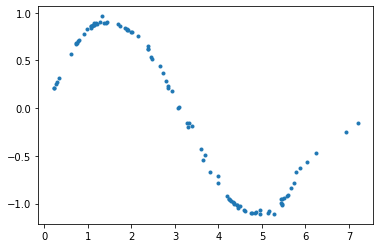

In [18]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")